#I-Préparation de données

In [30]:
# pip install tensorflow

In [31]:
# pip install plotting

In [32]:
import tensorflow # Importation de la bibliothèque tensorflow
import numpy as np # Importation de la bibliothèque Numpy
from tensorflow.keras.datasets import mnist # Importation de la base de données 'mnist' (60k images entrainement; 10k images tests)
(x_train, y_train), (x_test, y_test)= mnist.load_data()
'''
    x_train : Ensemble d'images d'entraînement (60k images).
    y_train : Labels correspondant à ces images (chiffres entre 0 et 9).
    x_test : Ensemble d'images de test (10k images).
    y_test : Labels correspondant aux images de test.
'''


datas = np.concatenate((x_train, x_test), axis=0)
# Concatenate a fusionné les valeurs des tableaux x_train et x_test pour faire un tableau avec les 70k images
# datas stock les images

label = np.concatenate((y_train, y_test), axis=0)
# De même ici, on a donc un tableau avec les 70k labels
# label=chiffre sur l'image


print(datas.shape)
print(label.shape)

(70000, 28, 28)
(70000,)


8

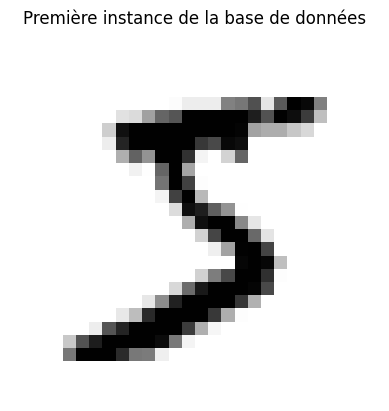

<class 'numpy.ndarray'>
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 

In [33]:
import matplotlib as mpl # Importation de la bibliothèque matplotlib
import matplotlib.pyplot as plt # pyplot est un module qui permet de tracer des graphiques.

val=datas[0] #val devient un tableau numpy représentant une image
image=val.reshape(28,28) #redimensionnement du tableau pour avoir une matrice 28*28 pixels

plt.imshow(image, cmap=mpl.cm.binary) # Affichage de l'image
# 'cmap=mpl.cm.binary' permet d'afficher l'image en nuance de gris

# Affichage du titre
plt.title("Première instance de la base de données")
plt.axis('off') #on masque les axes pour une meilleur lisibilité
plt.show()

#type
print(type(image))

#classe
print(label[0])
print(datas[0])

9

In [34]:
label=label.astype(np.uint8) #Conversion des labels en entier non-signés de 8bits
print(type(label[0]))

<class 'numpy.uint8'>


# 2- Répartition des données

11

In [35]:
datas_train,label_train,datas_test,label_test=datas[:60000],label[:60000],datas[60000:],label[60000:]
'''
    datas_train : 60k images pour l'entraînement.
    label_train : Labels associés à ces images d'entraînement.
    datas_test : 10k images pour le test.
    label_test : Labels associés à ces images de test.
'''

# reformatage des données en vecteurs de 784 élément au lieu de matrice 28*28
datas_train = datas_train.reshape(datas_train.shape[0], -1)  # (60000, 784)
datas_test = datas_test.reshape(datas_test.shape[0], -1)    # (10000, 784)
print(datas_train.shape)
print(datas_test.shape)

(60000, 784)
(10000, 784)


## II- Apprentissage d'un classifieur multi-classes

# 1- Apprentissage des données

14

In [36]:
import sklearn as sk # Importation de la bibliothèque sklearn

In [37]:
model=sk.linear_model.SGDClassifier() #creation du modele d'apprentissage (ici, supervisé)
model.fit(datas_train,label_train) # Entrainement

SGDClassifier()

15

In [38]:
prediction=model.predict(datas_train) # On fait une prediction du modele sur les données d'entrainement
# retourne un tableau contenant les prédictions pour chaque image sous forme de chiffres entre 0 et 9

print(prediction[0:10]) #affichage de la prédiction
print(label_train[0:10]) #affichage de la valeur réelle

[5 0 4 1 9 2 1 3 1 4]
[5 0 4 1 9 2 1 3 1 4]


On peut voir que les prédictions ont l'air plûtot bonnes

16

In [39]:
score=model.decision_function(datas_train) #donne les scores de décisions pour chaque classe (0 a 9)
# Un score n'est pas une prédiction de classe, mais un indicateur de la confiance du modèle pour chaque classe.
print(score[0])

classe_predit = np.argmax(score[0]) #on prend la classe qui a le score maximum (ici, la 5)
print(classe_predit)

[ -8812.96270054 -19180.60349745 -11571.99069862   -377.53868591
 -18038.19975511    149.08415689 -24661.47313722 -23576.59037548
  -5951.42784278 -10772.4822213 ]
5


# 2- Evaluation du modèle d'apprentissage sur les données d'apprentissage

##  2-1- Taux de classification

19

In [40]:
pli=sk.model_selection.cross_val_score(model,datas_train,label_train,scoring="accuracy",cv=3)  #utilisation méthode 3-fold cross validation pour évaluer le SGD

In [41]:
for i in range(3):
  print(pli[i]) #taux de classification de chaque fold
print("la moyenne des plis est de : ")
print(pli.mean()) #affichage de la moyenne des taux de classification


0.85415
0.867
0.8766
la moyenne des plis est de : 
0.8659166666666667


20

In [42]:
Sscaler=sk.preprocessing.StandardScaler() # transformation d'un feature en un autre qui suit une loi normale
datas_train_scalered=Sscaler.fit_transform(datas_train)

In [43]:
pli2=sk.model_selection.cross_val_score(model,datas_train_scalered,label_train,scoring="accuracy",cv=3) #évaluation du classifeur SGD

In [44]:
for i in range(3):
  print(pli2[i]) #taux de classification de chaque fold
print("la moyenne des plis est de :")
print(pli2.mean()) #affichage de la moyenne des taux de classification

0.89545
0.8931
0.90425
la moyenne des plis est de :
0.8976000000000001


##2-2 matrice de confusion

22

In [45]:
predict=sk.model_selection.cross_val_predict(model,datas_train,label_train,cv=3) #prédiction des classes des données d'apprentissage

In [46]:
print(predict) #affichage de la prédicition

[5 0 4 ... 5 6 8]


23

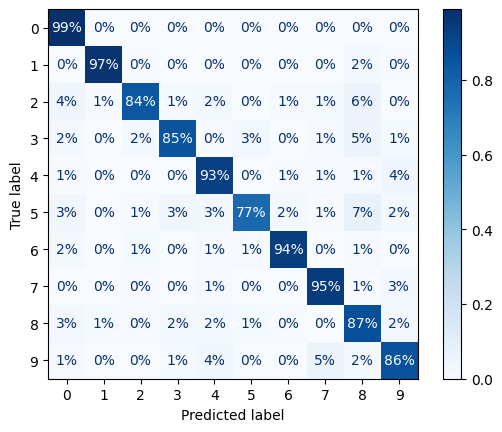

In [47]:
cm=sk.metrics.confusion_matrix(label_train,prediction,normalize="true") #affichage de la matrice de confusion
disp = sk.metrics.ConfusionMatrixDisplay(confusion_matrix=cm) #affichage de la version normalisée de la matrice de confusion
disp.plot(cmap=plt.cm.Blues, values_format=".0%")
plt.show()

Le modèle fait plus d'erreur sur la classe 8 qui est confondu avec le 2 le 5 et le 9

#2-3 Précision et rappel

25

In [48]:
F1=sk.metrics.f1_score(label_train,prediction,average="weighted") #prend en compte la proportion de chaque classe dans le calcul global
rappel=sk.metrics.recall_score(label_train,prediction,average="weighted") #mesure la capcité du modèle à trouver tous les vrais positifs
precision=sk.metrics.precision_score(label_train,prediction,average="weighted") #mesure la proportio de prédiction positives correctes
print("La valeur de F1 vaut : ", F1)
print("La valeur de rappel vaut : ", rappel)
print("La valeur de précision vaut : ", precision)

La valeur de F1 vaut :  0.8978678041288264
La valeur de rappel vaut :  0.89815
La valeur de précision vaut :  0.9010405981161292


- F1 : C'est une moyenne harmonique entre précision et rappel, il donne une mesure unique de performance globale, avec cette valeur, le modèle a un bon compromis entre précision et rappel.
- Rappel : Cela indique la capcité du modèle à trouer toutes les instances positives.
- Precision : Cela montre la fiabilité des prédicitions positives.

## III-Classification multi-label

27

In [49]:

supsept=label_train>7  #stocke dans une variable True si les labels de la base d'apprentissage sont supérieur à 7
impaire=(label_train%2)!=0 #stocke dans une variable True si les labels de la base d'apprentissage sont impairs
multi_vect=np.c_[supsept,impaire] #concaténation des deux vecteurs

28

In [50]:
Kvoisin=sk.neighbors.KNeighborsClassifier()#création d'un objet du type Kneighbors Classifier
Kvoisin.fit(datas_train,multi_vect)#entrainement des données
predictkvoisin=Kvoisin.predict(datas_train) #prediction de la classe de première instance de la base de données
print(predictkvoisin)

[[False  True]
 [False False]
 [False False]
 ...
 [False  True]
 [False False]
 [ True False]]


La prédiction est bonne car 5<7 et 5 est impaire, en essayant avec 1,2,59998,59999 la prédiction est également correcte.


##IV - CLassification multi-output

31

In [51]:
datas_train_bruit=np.random.randint(0,100,(len(datas_train),784)) #création d'un vecteur de bruit
datas_train_bruit=datas_train+datas_train_bruit #ajout du bruit à la base d'apprentissage
print(datas_train_bruit)

[[14 98 96 ... 76 27 10]
 [84 16 71 ... 22 96 53]
 [ 5 57 87 ... 83 21 54]
 ...
 [86 34 37 ... 46  0 13]
 [38 99 41 ... 80 74 23]
 [18 22 43 ... 12 25 74]]


32

In [52]:
#même chose que la question 31 sauf que fait sur les images de test
datas_test_bruit=np.random.randint(0,100,(len(label_test),784))
datas_test_bruit=datas_test+datas_test_bruit
print(datas_test_bruit)

[[64 35 31 ... 38 65 56]
 [38 58  9 ... 86 29 85]
 [21 92 20 ... 56 36 57]
 ...
 [40 14  6 ... 85 51 28]
 [94 41 78 ... 29 91  3]
 [99 78 22 ... 18 84 54]]


33 et 34

In [53]:
labels_apprentissage_non_bruités = label_train #variable qui contient les images d'apprentissage non bruitées
labels_test_non_bruités = label_test ##variable qui contient les images de test non bruitées
print(label_train)
print(label_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


35

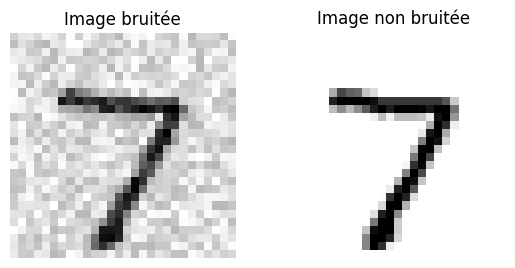

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#datas_test_bruit contient l'ensemble des images de test bruitées
some_digit = datas_test_bruit[0]
#labels_test_non_bruités contient les labels du clean test (non bruité)
y_some_digit = labels_test_non_bruités[0]
some_digit_image = some_digit.reshape(28, 28)
plt.subplot(121)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.title("Image bruitée")
plt.subplot(122)
plt.imshow(datas_test[0].reshape(28,28), cmap=mpl.cm.binary)
plt.axis("off")
plt.title("Image non bruitée")
plt.show()

plt.show()

36

Predicted vector values: [7]


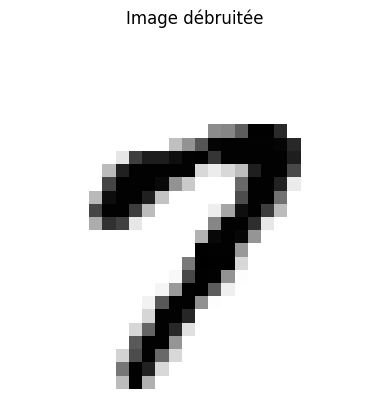

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

datas_train_bruit_reshape = datas_train_bruit.reshape(datas_train_bruit.shape[0], -1) #reshape des données d'apprentissage bruitées
labels_apprentissage_non_bruités_reshape = labels_apprentissage_non_bruités.reshape(labels_apprentissage_non_bruités.shape[0], -1) #reshape des données d'apprentissage non bruitées

knn_model = KNeighborsClassifier()
knn_model.fit(datas_train_bruit_reshape, labels_apprentissage_non_bruités_reshape.ravel())

predicted_vector = knn_model.predict(datas_test_bruit[0].reshape(1, -1)) #l'image à prédire en vecteur 1D

print("Predicted vector values:", predicted_vector)
clean_image_index = np.where(labels_apprentissage_non_bruités == predicted_vector[0])[0][0] #identification de l'image non bruitée correspondant à la prédiciton
clean_image = datas_train[clean_image_index].reshape(28,28) #récupération de l'image non bruitée
predicted_image = predicted_vector
plt.imshow(clean_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.title("Image débruitée")
plt.show()

Vecteur prédit : [7]
Classe prédite : [7]
Probabilités pour chaque classe :
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


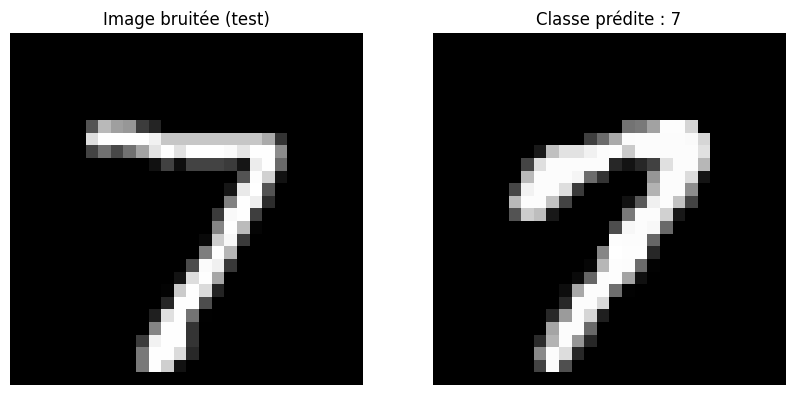

In [56]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)  # Utilise 5 voisins
knn.fit(datas_train_bruit_reshape, labels_apprentissage_non_bruités_reshape.ravel())

prediction_class = knn.predict(datas_test[0].reshape(1, -1))  # Prédiction pour la première image de test
print("Vecteur prédit :", prediction_class)
proba = knn.predict_proba(datas_test[:1])  # Probabilités des classes

print("Classe prédite :", prediction_class)
print("Probabilités pour chaque classe :")
print(proba[0])

test_image = datas_test[0].reshape(28, 28)

plt.figure(figsize=(10, 5))

# Image bruitée
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title("Image bruitée (test)")
plt.axis('off')

# Image reconstruite en fonction de la classe prédite
# Pour visualisation, supposons que la classe prédite correspond à une image prototype
prototype_image = datas_train[label_train == prediction_class[0]][0].reshape(28, 28)

plt.subplot(1, 2, 2)
plt.imshow(prototype_image, cmap='gray')
plt.title(f"Classe prédite : {prediction_class[0]}")
plt.axis('off')

plt.show()
